# Modelo De Detección De Objetos Para La Fac

Grupo 1
- Juan Camilo Colmenares Ortiz - 202011866
- Juan Sebastian Montealegre - 202017834
- Francisco - XXXXXXXXX

### Imports

In [2]:
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3


# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input, GlobalAveragePooling2D
from keras import backend as K
from keras import applications
from keras.utils import plot_model


import keras_tuner as kt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
import shutil as sh

import matplotlib.pyplot as plt
from IPython.display import Image, clear_output
%matplotlib inline

import os
import shutil
from xml.etree import ElementTree as ET
import cv2
import xml.etree.ElementTree as ET
from PIL import Image
import glob

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.13.0


c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Primer modelo

In [6]:
#Aca se dividen los archivos del drive
def divide_files_type(source_dir, dest_img_dir, dest_label_dir):
    
    for filename in os.listdir(source_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            shutil.move(os.path.join(source_dir, filename), os.path.join(dest_img_dir, filename))
        elif filename.endswith('.txt'):
            shutil.move(os.path.join(source_dir, filename), os.path.join(dest_label_dir, filename))

source_directory = 'video46min_33to46/video46min_33to46' 

#video46min_33to46
#processed_images

destination_image_directory = 'images'
destination_label_directory = 'labels'

divide_files_type(source_directory, destination_image_directory, destination_label_directory)

In [7]:
curr_path = os.getcwd()
img_train_path = os.path.join(curr_path,'images','train')
img_val_path = os.path.join(curr_path,'images','val')
img_test_path = os.path.join(curr_path,'images','test')

label_train_path = os.path.join(curr_path,'labels','train')
label_val_path = os.path.join(curr_path,'labels','val')
label_test_path = os.path.join(curr_path,'labels','test')

In [8]:
img_test_path, label_test_path

('c:\\Users\\juank\\Desktop\\NoDigasMamadas\\images\\test',
 'c:\\Users\\juank\\Desktop\\NoDigasMamadas\\labels\\test')

In [9]:
curr_path

'c:\\Users\\juank\\Desktop\\NoDigasMamadas'

In [10]:
curr_path = os.getcwd()
# label_path = os.path.join(curr_path, 'labs')
data_path = ''
img_path = curr_path+'/images'
label_path = curr_path+'/labels'

In [11]:
img_path

'c:\\Users\\juank\\Desktop\\NoDigasMamadas/images'

In [12]:
faceList = os.listdir(img_path)
faceList[:3]

['test', 'train', 'val']

In [13]:
dataSize = len(faceList)
dataSize

1506

In [14]:
random.shuffle(faceList)
faceList[:5]

['video_13min_771.jpg',
 'video_13min_614.jpg',
 'video_13min_789.jpg',
 'video_11min_142.jpg',
 'video_11min_558.jpg']

In [15]:
trainSplit = 0.7
valSplit = 0.1
testSplit = 0.2

imgTrainList = faceList[:int(dataSize*trainSplit)]
imgValList = faceList[int(dataSize*trainSplit):int(dataSize*(trainSplit+valSplit))]
imgTestList = faceList[int(dataSize*(trainSplit+valSplit)):]
len(imgTrainList), len(imgValList), len(imgTestList)

(1054, 150, 302)

In [15]:
imgTrainList = os.listdir(img_train_path)
imgValList = os.listdir(img_val_path)
imgTestList = os.listdir(img_test_path)
len(imgTrainList), len(imgValList), len(imgTestList)

(497, 72, 143)

In [16]:
def move_files(data_list, source_path, destination_path):
    i=0
    for file in data_list:
        filepath=os.path.join(source_path, file)
        dest_path=os.path.join(data_path, destination_path)
        if not os.path.isdir(dest_path):
            os.makedirs(dest_path)
        try:
            shutil.move(filepath, dest_path)
        except:
            print("Error")
        i=i+1
    print("Number of files transferred:", i)

In [18]:
def_size = 224 #Needed for almost all pre-trained models from TensorFlow
def move_images(data_list, source_path, destination_path):
    i=0
    for file in data_list:
        filepath=os.path.join(source_path, file)
        dest_path=os.path.join(data_path, destination_path)

        if not os.path.isdir(dest_path):
            os.makedirs(dest_path)
        finalimage_path=os.path.join(dest_path, file)
        try:
            img_resized=cv2.resize(cv2.imread(filepath), (def_size, def_size))
            cv2.imwrite(finalimage_path, img_resized)
        except:
            print("Error")
        i=i+1
    print("Number of files transferred:", i)

In [19]:
def_size = 224
space = ' '
new_line = '\n'
text = '.txt'
class_id = 0

def change_extension(file):
    basename=os.path.splitext(file)[0]
    filename=basename+text
    return filename

labelTrainList = list(map(change_extension, imgTrainList))
labelValList = list(map(change_extension, imgValList))
labelTestList = list(map(change_extension, imgTestList))
len(labelTrainList), len(labelValList), len(labelTestList)

(1054, 150, 302)

In [20]:
len(imgTrainList)

1054

In [21]:
move_images(imgTrainList, img_path, img_train_path)

Error
Number of files transferred: 1054


In [22]:
move_images(imgValList, img_path, img_val_path)

Error
Error
Number of files transferred: 150


In [23]:
move_images(imgTestList, img_path, img_test_path)

Number of files transferred: 302


In [24]:
move_files(labelTrainList, label_path, label_train_path)

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Number of files transferred: 1054


In [25]:
move_files(labelValList, label_path, label_val_path)

Error
Error
Error
Error
Number of files transferred: 150


In [26]:
move_files(labelTestList, label_path, label_test_path)

Error
Error
Error
Error
Error
Error
Error
Number of files transferred: 302


In [27]:
len(imgTrainList),len(labelTrainList)

(1054, 1054)

In [28]:
imgTrainList[45], labelTrainList[45]

('video_11min_314.jpg', 'video_11min_314.txt')

In [29]:
len(imgTestList),len(labelTestList)

(302, 302)

In [30]:
imgTestList[23], labelTestList[23]

('video_11min_031.jpg', 'video_11min_031.txt')

In [31]:
len(imgValList),len(labelValList)

(150, 150)

In [32]:
imgValList[44], labelValList[44] 

('video_11min_408.jpg', 'video_11min_408.txt')

In [25]:
def_size = 300
space = ' '
new_line = '\n'
text = '.txt'
class_id = 0

In [46]:
ln_1='# Train/val/test sets'+new_line
ln_2='train: ' +"'"+img_train_path+"'"+new_line
ln_3='val: ' +"'" + img_val_path+"'"+new_line
ln_4='test: ' +"'" + img_test_path+"'"+new_line
ln_5=new_line
ln_6='# Classes'+new_line
# ln_7='names:'+new_line
# ln_8='  0: object'
ln_7='nc:'+str(5)
ln_8="  names: ['Vehiculos', 'Construcciones', 'Vias', 'Rios', 'Mineria']"
config_lines=[ln_1, ln_2, ln_3, ln_4, ln_5, ln_6, ln_7, ln_8]

In [47]:
config_path=os.path.join(curr_path, 'config.yaml')
config_path

'c:\\Users\\juank\\Desktop\\NoDigasMamadas\\config.yaml'

In [48]:
with open(config_path, 'w') as f:
    f.writelines(config_lines)

c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_301.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_004.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_239.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_234.txt


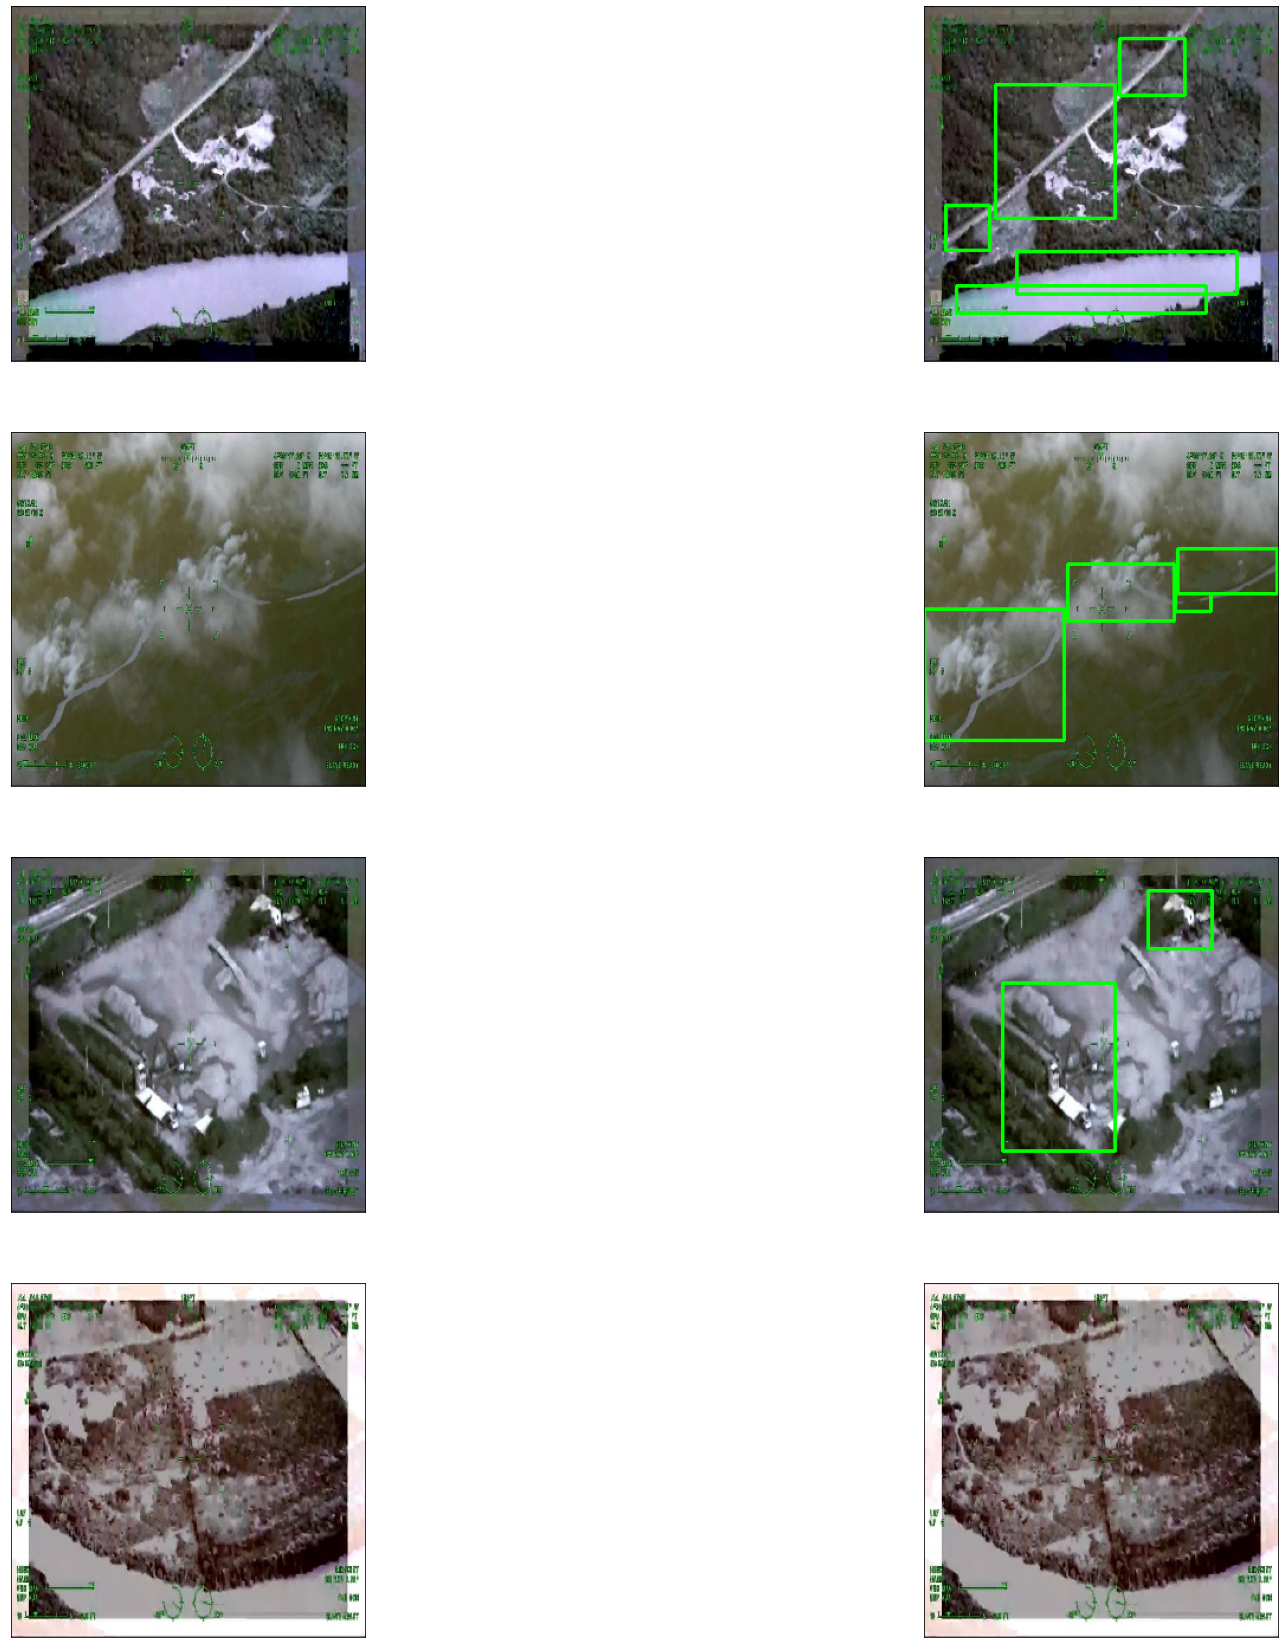

In [32]:
import copy
green = (0,255,0)
def get_bbox_from_label(text_file_path):
    bbox_list=[]
    print(text_file_path)
    with open(text_file_path, "r") as file:
        
        for line in file:
            _,x_centre,y_centre,width,height=line.strip().split(" ")
            x1=(float(x_centre)+(float(width)/2))*def_size
            x0=(float(x_centre)-(float(width)/2))*def_size
            y1=(float(y_centre)+(float(height)/2))*def_size
            y0=(float(y_centre)-(float(height)/2))*def_size

            vertices=np.array([[int(x0), int(y0)], [int(x1), int(y0)],
                               [int(x1),int(y1)], [int(x0),int(y1)]])
#             vertices=vertices.reshape((-1,1,2))
            bbox_list.append(vertices)

    return tuple(bbox_list)

plt.figure(figsize=(30,30))
for i in range(1,8,2):
    k = random.randint(0, len(imgTrainList)-1)
    img_path = os.path.join(img_train_path, imgTrainList[k])
    label_path = os.path.join(label_train_path, labelTrainList[k])
    print(img_train_path,label_train_path)
    bbox = get_bbox_from_label(label_path)
    img = cv2.imread(img_path)
    copy_img = copy.deepcopy(img)
    ax=plt.subplot(4, 2, i)
    plt.imshow(img) # displaying image
    plt.xticks([])
    plt.yticks([])
    cv2.drawContours(copy_img, bbox, -1, green, 2)
    ax=plt.subplot(4, 2, i+1)
    plt.imshow(copy_img) # displaying image with bounding box
    plt.xticks([])
    plt.yticks([])

In [33]:
!pip install ultralytics

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.5.0
    Uninstalling typing-extensions-4.5.0:
      Successfully uninstalled typing-extensions-4.5.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.60.0
    Uninstalling tqdm-4.60.0:
      Successfully uninstalled tqdm-4.60.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.11.0 which is incompatible.
rich 6.2.0 requires typing-extensions<4.0.0,>=3.7.4, but you have typing-extensions 4.11.0 which is incompatible.
You should consider upgrading via the 'c:\users\juank\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [35]:
from ultralytics import YOLO

In [36]:
model=YOLO('yolov8n.yaml').load('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 13.1MB/s]

Transferred 355/355 items from pretrained weights


In [37]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [50]:
results=model.train(data=config_path, epochs=10, resume=True, iou=0.5, conf=0.001)

Ultralytics YOLOv8.1.47  Python-3.8.1 torch-2.2.2+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=c:\Users\juank\Desktop\NoDigasMamadas\config.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

100%|██████████| 755k/755k [00:00<00:00, 4.95MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Users\juank\Desktop\NoDigasMamadas\labels\train... 497 images, 101 backgrounds, 0 corrupt: 100%|██████████| 497/497 [00:01<00:00, 428.84it/s]


train: New cache created: C:\Users\juank\Desktop\NoDigasMamadas\labels\train.cache


val: Scanning C:\Users\juank\Desktop\NoDigasMamadas\labels\val... 72 images, 27 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<00:00, 295.19it/s]

val: New cache created: C:\Users\juank\Desktop\NoDigasMamadas\labels\val.cache


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.563      4.791       2.62          1        640: 100%|██████████| 32/32 [03:22<00:00,  6.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.65s/it]

                   all         72         70    0.00141      0.469     0.0521     0.0118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.388       4.32      2.459          3        640: 100%|██████████| 32/32 [03:10<00:00,  5.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.65s/it]

                   all         72         70    0.00204      0.425     0.0515     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.368      4.031      2.503          1        640: 100%|██████████| 32/32 [03:04<00:00,  5.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.42s/it]

                   all         72         70    0.00177      0.558     0.0433    0.00712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/10         0G      2.339       4.01      2.438          0        640: 100%|██████████| 32/32 [02:57<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.58s/it]

                   all         72         70      0.861      0.117     0.0546     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.319      3.666      2.443          2        640: 100%|██████████| 32/32 [03:02<00:00,  5.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.66s/it]

                   all         72         70      0.442      0.177     0.0583    0.00876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.322      3.488      2.418          2        640: 100%|██████████| 32/32 [02:56<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.52s/it]

                   all         72         70      0.126      0.134     0.0853     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.277      3.393      2.366          1        640: 100%|██████████| 32/32 [02:58<00:00,  5.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.68s/it]

                   all         72         70      0.138      0.263     0.0842     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.126      3.094      2.285          2        640: 100%|██████████| 32/32 [02:57<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.53s/it]

                   all         72         70      0.224       0.28      0.189     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.018      3.085      2.149          0        640: 100%|██████████| 32/32 [02:57<00:00,  5.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.62s/it]

                   all         72         70      0.262      0.268      0.188       0.04

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/10         0G      2.079      3.029      2.246          1        640: 100%|██████████| 32/32 [03:00<00:00,  5.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.51s/it]

                   all         72         70      0.286      0.372      0.263     0.0729



10 epochs completed in 0.542 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.1.47  Python-3.8.1 torch-2.2.2+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.06s/it]


                   all         72         70      0.279      0.365      0.263     0.0731
             Vehiculos         72         13      0.346      0.462      0.206     0.0285
        Construcciones         72         13      0.509      0.462      0.349      0.114
                  Vias         72         30      0.264      0.567      0.411      0.132
                  Rios         72         12      0.278      0.333      0.293     0.0843
               Mineria         72          2          0          0     0.0565    0.00633
Speed: 3.2ms preprocess, 111.8ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs\detect\train3


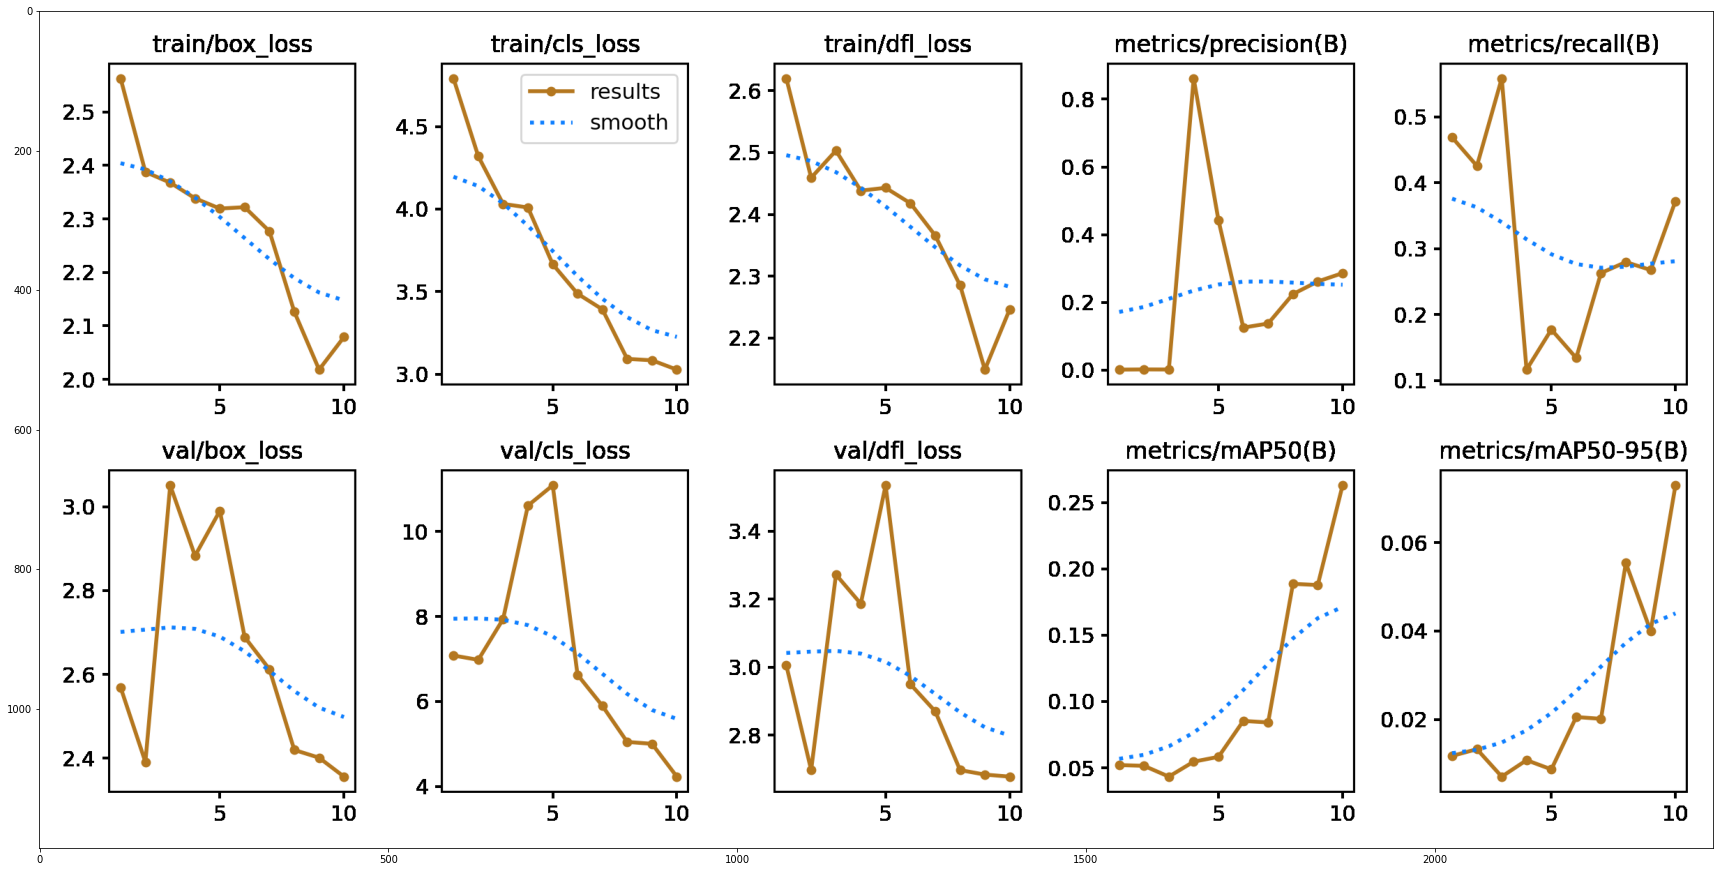

In [52]:
plt.figure(figsize=(30,30))
trainingresult_path=os.path.join(curr_path, 'runs', 'detect', 'train3')
results_png=cv2.imread(os.path.join(trainingresult_path,'results.png'))
plt.imshow(results_png)

In [53]:
def evaluate_map50(trainedmodel, data_path, dataset='val'):
    metrics=trainedmodel.val(data=data_path, split=dataset)
    map50=round(metrics.box.map50, 3)
    print("The mAP of model on {0} dataset is {1}".format(dataset,map50))
    return metrics, map50

In [54]:
def display_curves(root_path):
    plt.figure(figsize=(50,50))

    #displaying p curve
    p_curve=cv2.imread(os.path.join(root_path,'P_curve.png'))
    ax=plt.subplot(5,1,1)
    plt.imshow(p_curve)

    #displaying r curve
    r_curve=cv2.imread(os.path.join(root_path,'R_curve.png'))
    ax=plt.subplot(5,1,2)
    plt.imshow(r_curve)

    #displaying pr curve
    pr_curve=cv2.imread(os.path.join(root_path,'PR_curve.png'))
    ax=plt.subplot(5,1,3)
    plt.imshow(pr_curve)

    #displaying f1 curve
    f1_curve=cv2.imread(os.path.join(root_path,'F1_curve.png'))
    ax=plt.subplot(5,1,4)
    plt.imshow(f1_curve)

    #displaying confusion matrix
    confusion_matrix=cv2.imread(os.path.join(root_path,'confusion_matrix.png'))
    ax=plt.subplot(5,1,5)
    plt.imshow(confusion_matrix)

In [55]:
train_metrics, train_map50=evaluate_map50(model, config_path, dataset='train')

Ultralytics YOLOv8.1.47  Python-3.8.1 torch-2.2.2+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\juank\Desktop\NoDigasMamadas\labels\train.cache... 497 images, 101 backgrounds, 0 corrupt: 100%|██████████| 497/497 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]


                   all        497        750      0.444      0.493      0.414      0.141
             Vehiculos        497         20      0.298        0.5      0.279     0.0772
        Construcciones        497        128      0.443      0.383      0.315     0.0881
                  Vias        497        163      0.321      0.742      0.585      0.239
                  Rios        497        347      0.477      0.582      0.519      0.184
               Mineria        497         92      0.682      0.257      0.372      0.116
Speed: 3.0ms preprocess, 122.1ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs\detect\train32
The mAP of model on train dataset is 0.414


In [56]:
train_path=os.path.join(curr_path, 'runs', 'detect', 'train32')

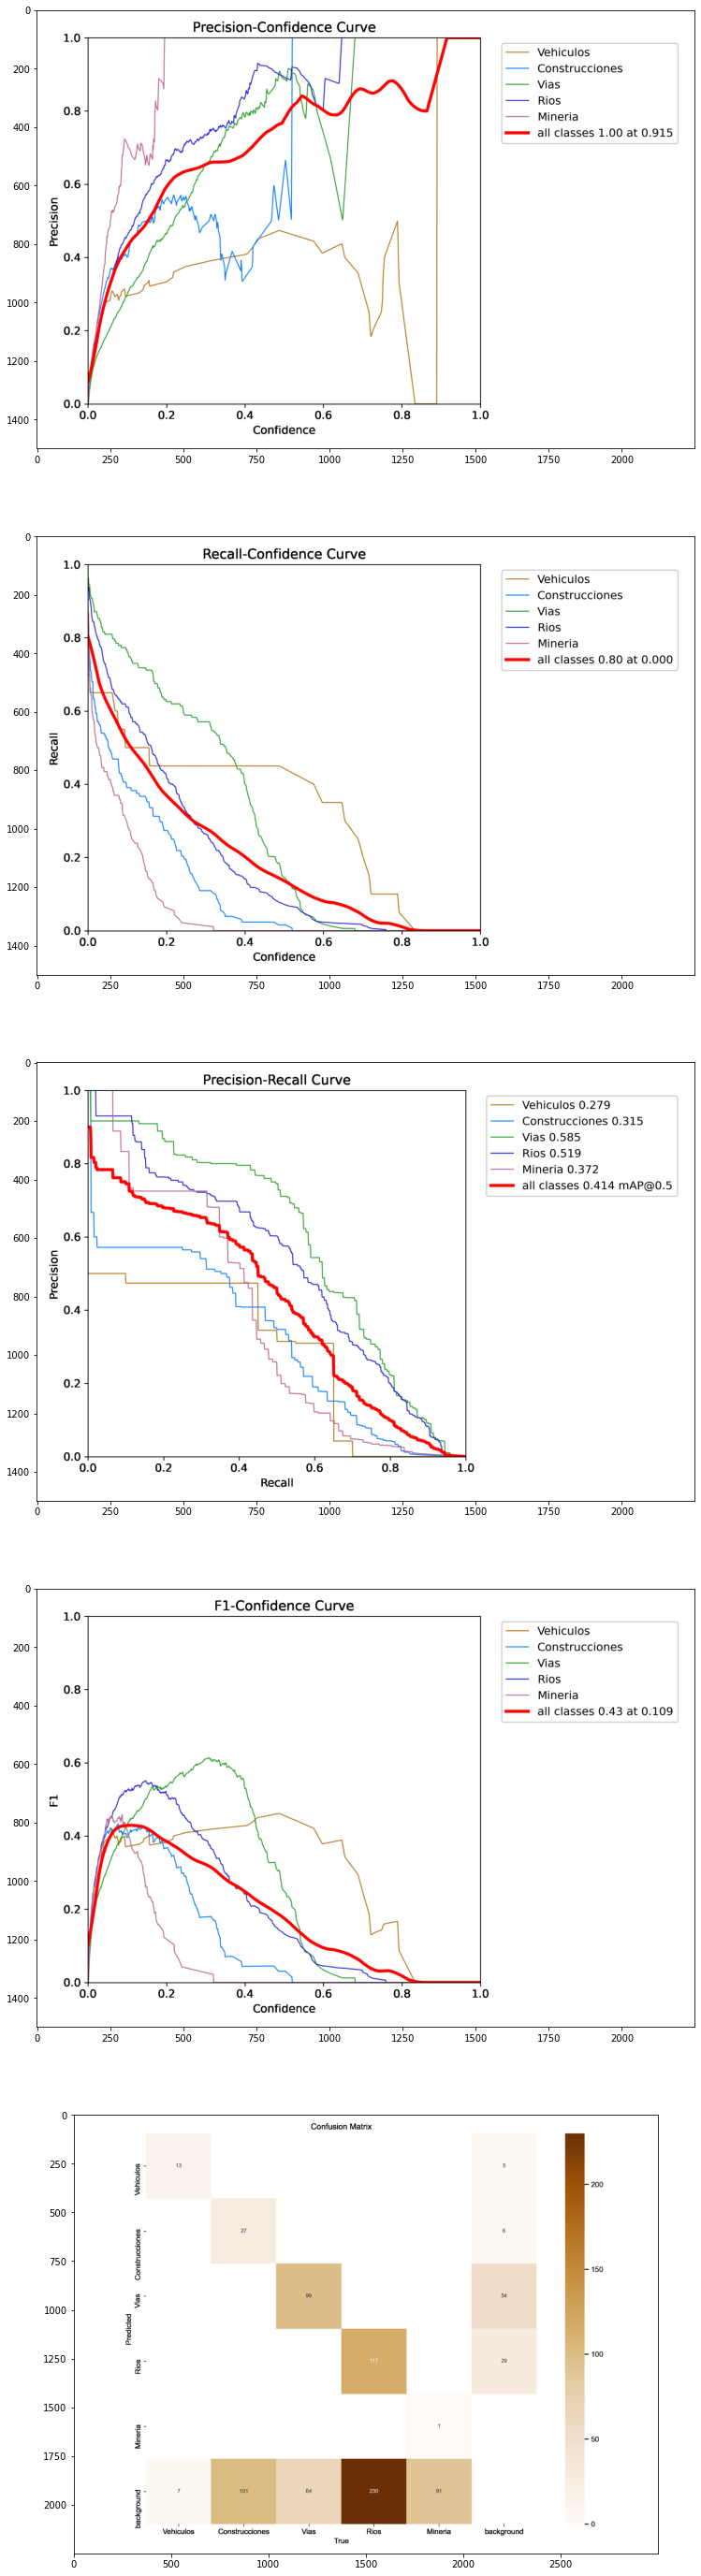

In [57]:
display_curves(train_path)